In [23]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

In [2]:
# Loading Data into a DataFrame
ic50_path = 'data/GDSC2_fitted_dose_response.csv'
cle_path = 'data/cell_line_expressions.csv'

ic50_df = pd.read_csv(ic50_path)
cle_df = pd.read_csv(cle_path)

# Only take the necessary columns
ic50_df_filtered = ic50_df[['CELL_LINE_NAME', 'LN_IC50', 'DRUG_ID']]

# Filter the DataFrame for DRUG_ID = 1003
ic50_df_filtered = ic50_df_filtered[ic50_df_filtered['DRUG_ID'] == 1003]

# Perform a left join on CELL_LINE_NAME between filtered_ic50_df and cle_df
ic50_df_filtered['CELL_LINE_NAME'] = ic50_df_filtered['CELL_LINE_NAME'].str.lower()
cle_df['Cell_Line'] = cle_df['Cell_Line'].str.lower()
merged_df = pd.merge(ic50_df_filtered, cle_df, how='inner', left_on='CELL_LINE_NAME', right_on='Cell_Line')
merged_df = merged_df.drop(columns=['DRUG_ID', 'CELL_LINE_NAME', 'Cell_Line'])
# merged_df = merged_df.dropna(subset=['A1CF']) # Drop rows where the cell line is in the ic_50 but not in the cell line expression

In [36]:
merged_df

,LN_IC50,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,-1.463887,5.495730,3.184308,3.321914,2.627464,2.514125,3.218487,3.120695,4.202315,4.737083,...,8.495685,9.569126,3.386338,3.634583,5.015195,2.951442,5.496435,4.982619,5.532265,6.390069
1,-4.869455,4.337785,3.524041,4.293388,4.840715,3.503136,3.829524,3.727634,6.422815,5.148218,...,8.573578,9.960248,4.063253,4.346629,6.681798,3.436585,6.488848,5.807403,5.695039,8.541820
2,-3.360586,4.505186,2.844291,7.184541,7.509017,3.258733,3.179573,3.321791,4.703138,4.482317,...,8.024057,8.584954,3.234750,3.468513,6.934609,3.640425,6.262471,4.435468,5.618358,8.103560
3,-5.044940,4.852680,3.065630,5.516146,2.737862,3.409567,3.318515,2.993318,4.105093,4.424339,...,8.120168,7.182749,3.715546,3.699682,6.932339,3.038383,5.692875,6.902294,5.838749,7.682843
4,-3.741991,5.148965,3.333330,3.534536,4.159192,3.206313,3.944100,3.661659,5.888597,4.460844,...,8.727072,10.220065,3.793053,4.454676,6.529822,3.870618,6.525355,5.760511,6.177412,8.240070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,-1.612538,2.973651,2.617614,2.720144,2.807269,2.150450,2.796000,3.087380,3.966755,3.739160,...,7.655096,9.300281,3.047196,3.233912,3.966685,2.562082,4.126043,4.620161,4.556275,6.120560
911,1.343563,3.232733,6.201046,3.162698,2.776605,2.969494,3.168680,3.464995,4.254161,4.986747,...,7.815462,8.976067,3.068122,3.758100,5.323364,2.717029,4.528628,4.597326,5.159982,6.030104
912,0.073547,2.736452,4.166436,2.813089,2.572081,2.723150,2.677522,2.836038,3.151093,4.440422,...,8.509582,9.406320,2.836038,2.976179,4.118400,2.629033,4.370419,4.902584,4.293098,5.532127
913,-2.421554,2.238269,2.258082,2.296148,2.001320,2.198522,2.398553,2.758177,2.896409,3.225050,...,6.328485,7.805421,2.434228,3.124404,3.739624,2.072294,4.413430,4.262453,4.193033,6.428802


In [21]:
# Split the features and output
final_features = merged_df.drop(columns=['LN_IC50'])
final_output = merged_df['LN_IC50']

average_ln_ic50 = final_output.mean()
print(average_ln_ic50)


mse: 3.406
-2.2542919759562845


Text(0.5, 0, 'LN_IC50')

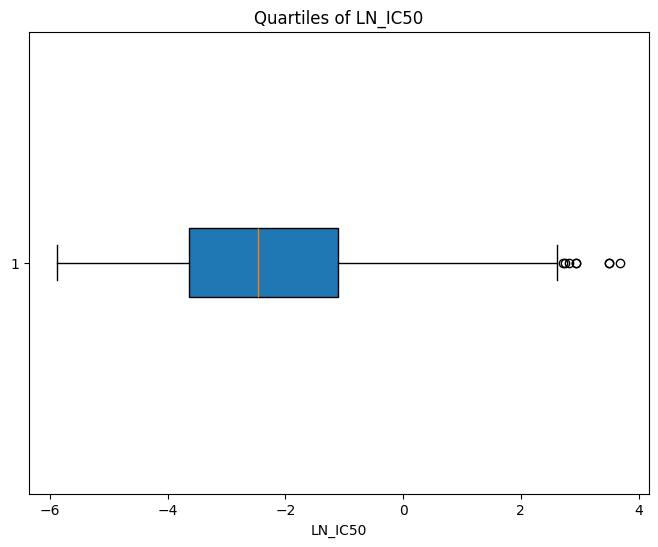

In [32]:
plt.figure(figsize=(8, 6))
plt.boxplot(final_output, vert=False, patch_artist=True)

# Adding titles and labels
plt.title('Quartiles of LN_IC50')
plt.xlabel('LN_IC50')

In [ ]:
diff = []
for i in range(len(final_output)):
    diff.append(average_ln_ic50)

# Target for MSE under 3 when training
print(f"MSE: {round(mean_squared_error(final_output, diff), 4)}")

In [41]:
unique_drugs_id = ic50_df['DRUG_ID'].unique()
ic50_df = ic50_df[['CELL_LINE_NAME', 'LN_IC50', 'DRUG_ID']]
num_cell_lines = []
for drug_id in unique_drugs_id:
    # Filter the DataFrame for DRUG_ID = 1003
    ic50_df_filtered = ic50_df[ic50_df['DRUG_ID'] == drug_id]

    # Perform a left join on CELL_LINE_NAME between filtered_ic50_df and cle_df
    ic50_df_filtered['CELL_LINE_NAME'] = ic50_df_filtered['CELL_LINE_NAME'].str.lower()
    cle_df['Cell_Line'] = cle_df['Cell_Line'].str.lower()
    merged_df = pd.merge(ic50_df_filtered, cle_df, how='inner', left_on='CELL_LINE_NAME', right_on='Cell_Line')
    merged_df = merged_df.drop(columns=['DRUG_ID', 'CELL_LINE_NAME', 'Cell_Line'])
    num_cell_lines.append(merged_df.shape[0])

/tmp/ipykernel_455810/2678409218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic50_df_filtered['CELL_LINE_NAME'] = ic50_df_filtered['CELL_LINE_NAME'].str.lower()
/tmp/ipykernel_455810/2678409218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic50_df_filtered['CELL_LINE_NAME'] = ic50_df_filtered['CELL_LINE_NAME'].str.lower()
/tmp/ipykernel_455810/2678409218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [47]:
avg_cell_lines = sum(num_cell_lines) / len(num_cell_lines)
min_cell_lines = min(num_cell_lines)
max_cell_lines = max(num_cell_lines)
print(f"Average amount of cell lines:{round(avg_cell_lines, 4)}")
print(f"Min cell lines:{min_cell_lines}")
print(f"Max cell lines:{max_cell_lines}")

Average amount of cell lines:781.2339
Min cell lines:193
Max cell lines:916


Text(0.5, 0, 'Number of Cell Lines')

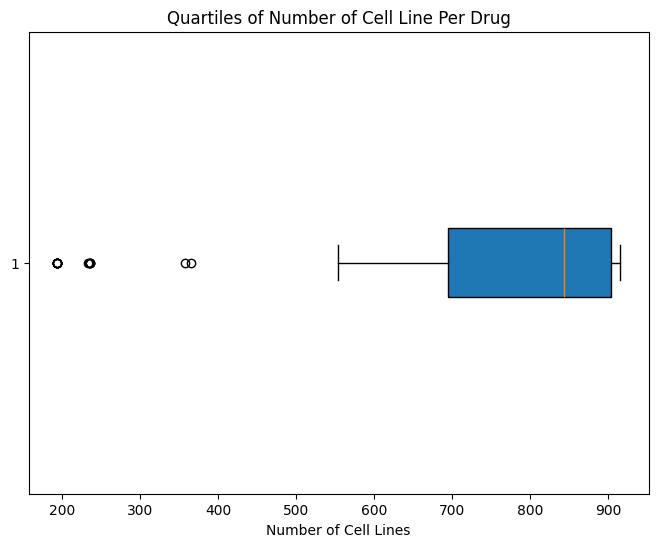

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot(num_cell_lines, vert=False, patch_artist=True)

# Adding titles and labels
plt.title('Quartiles of Number of Cell Line Per Drug')
plt.xlabel('Number of Cell Lines')